# Urban Mobility Risk Analysis


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import fetch_data as fd
import geopandas as gpd
import matplotlib.patheffects as pe
from fetch_data import fetch_traffic_data
fetch_traffic_data()

Already have 2016.csv, skipping...
Already have 2017.csv, skipping...
Already have 2018.csv, skipping...
Already have 2019.csv, skipping...
Already have 2020.csv, skipping...
Already have 2021.csv, skipping...
Already have 2022.csv, skipping...
Already have 2023.csv, skipping...
Already have 2024.csv, skipping...


In [11]:
pd.set_option("display.max_columns", None)  # show all columns
pd.set_option("display.width", None)        # don’t wrap lines

Fetch the data from years 2016-2024 if we don't have them already.


In [12]:
fd.fetch_traffic_data()

Already have 2016.csv, skipping...
Already have 2017.csv, skipping...
Already have 2018.csv, skipping...
Already have 2019.csv, skipping...
Already have 2020.csv, skipping...
Already have 2021.csv, skipping...
Already have 2022.csv, skipping...
Already have 2023.csv, skipping...
Already have 2024.csv, skipping...


In [13]:
fr_2024 = fd.get_df(2024)
fr_2023 = fd.get_df(2023)
fr_2022 = fd.get_df(2022)
fr_2021 = fd.get_df(2021)
fr_2020 = fd.get_df(2020)
fr_2019 = fd.get_df(2019)
fr_2018 = fd.get_df(2018)
fr_2017 = fd.get_df(2017)
fr_2016 = fd.get_df(2016)
fr_2020.head(10)

,OID_,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,UART,UTYP1,ULICHTVERH,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84,USTRZUSTAND,Community_key
0,2020_1,12,0,68,468,2020,1,11,5,2,1,7,0,0,0,0,0,1,0,735840.4367,5.887205e+06,12.521519,53.082133,0,12068468
1,2020_2,12,0,61,112,2020,1,17,2,3,6,2,0,0,1,1,0,0,0,814106.9919,5.811961e+06,13.614609,52.367678,0,12061112
2,2020_3,12,0,67,144,2020,1,16,5,3,5,2,0,1,1,0,0,0,0,845207.3757,5.811964e+06,14.069661,52.349021,1,12067144
3,2020_4,12,0,69,076,2020,1,11,6,3,5,3,0,0,1,0,0,0,0,756844.8340,5.787696e+06,12.757075,52.179830,1,12069076
4,2020_5,12,0,62,224,2020,1,16,6,3,3,2,1,1,1,0,0,0,0,793616.4896,5.735748e+06,13.249132,51.695730,0,12062224
5,2020_6,12,0,68,320,2020,1,7,2,3,5,3,1,1,1,0,0,0,0,756494.9800,5.872222e+06,12.817314,52.938227,0,12068320
6,2020_7,12,0,66,196,2020,1,7,3,2,8,1,0,0,1,0,0,0,0,842046.0221,5.756949e+06,13.968228,51.858248,1,12066196
7,2020_8,12,0,67,040,2020,1,13,3,2,2,6,0,0,0,0,0,1,0,854931.7173,5.811355e+06,14.211196,52.337363,0,12067040
8,2020_9,12,0,65,198,2020,1,20,6,3,7,7,2,0,1,0,0,0,0,787499.5736,5.868791e+06,13.274382,52.891774,1,12065198
9,2020_10,12,0,54,000,2020,1,14,7,3,5,3,0,1,1,0,0,0,0,777002.1813,5.813906e+06,13.072695,52.405129,1,12054000


In [7]:
fr_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268519 entries, 0 to 268518
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   OID_           268519 non-null  object 
 1   ULAND          268519 non-null  object 
 2   UREGBEZ        268519 non-null  object 
 3   UKREIS         268519 non-null  object 
 4   UGEMEINDE      268519 non-null  object 
 5   UJAHR          268519 non-null  int64  
 6   UMONAT         268519 non-null  int64  
 7   USTUNDE        268519 non-null  int64  
 8   UWOCHENTAG     268519 non-null  int64  
 9   UKATEGORIE     268519 non-null  int64  
 10  UART           268519 non-null  int64  
 11  UTYP1          268519 non-null  int64  
 12  ULICHTVERH     268519 non-null  int64  
 13  USTRZUSTAND    268519 non-null  int64  
 14  IstRad         268519 non-null  int64  
 15  IstPKW         268519 non-null  int64  
 16  IstFuss        268519 non-null  int64  
 17  IstKrad        268519 non-nul

In [14]:
#number of lines and rows
fr_2024.shape
fr_2024.info


fr_2024.describe() #mean,max, std, min, max
fr_2024.nunique()

OID_             268519
ULAND                16
UREGBEZ               9
UKREIS               87
UGEMEINDE           532
UJAHR                 1
UMONAT               12
USTUNDE              24
UWOCHENTAG            7
UKATEGORIE            3
UART                 10
UTYP1                 7
ULICHTVERH            3
USTRZUSTAND           3
IstRad                2
IstPKW                2
IstFuss               2
IstKrad               2
IstGkfz               2
IstSonstige           2
LINREFX          264795
LINREFY          264806
XGCSWGS84        264803
YGCSWGS84        264809
Community_key      9508
dtype: int64

In [9]:
fr_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268519 entries, 0 to 268518
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   OID_           268519 non-null  object 
 1   ULAND          268519 non-null  object 
 2   UREGBEZ        268519 non-null  object 
 3   UKREIS         268519 non-null  object 
 4   UGEMEINDE      268519 non-null  object 
 5   UJAHR          268519 non-null  int64  
 6   UMONAT         268519 non-null  int64  
 7   USTUNDE        268519 non-null  int64  
 8   UWOCHENTAG     268519 non-null  int64  
 9   UKATEGORIE     268519 non-null  int64  
 10  UART           268519 non-null  int64  
 11  UTYP1          268519 non-null  int64  
 12  ULICHTVERH     268519 non-null  int64  
 13  USTRZUSTAND    268519 non-null  int64  
 14  IstRad         268519 non-null  int64  
 15  IstPKW         268519 non-null  int64  
 16  IstFuss        268519 non-null  int64  
 17  IstKrad        268519 non-nul

In [10]:
fr_2024.duplicated().sum()

np.int64(0)

In [82]:
fr_2024.isnull().sum().sort_values(ascending=False) #missing values

OID_             0
USTRZUSTAND      0
YGCSWGS84        0
XGCSWGS84        0
LINREFY          0
LINREFX          0
IstSonstige      0
IstGkfz          0
IstKrad          0
IstFuss          0
IstPKW           0
IstRad           0
ULICHTVERH       0
ULAND            0
UTYP1            0
UART             0
UKATEGORIE       0
UWOCHENTAG       0
USTUNDE          0
UMONAT           0
UJAHR            0
UGEMEINDE        0
UKREIS           0
UREGBEZ          0
Community_key    0
dtype: int64

In [83]:
fr_2024.info

<bound method DataFrame.info of                OID_ ULAND UREGBEZ UKREIS UGEMEINDE  UJAHR  UMONAT  USTUNDE  \
0            2024_1    01       0     59       044   2024       5       23   
1            2024_2    01       0     62       094   2024       5       23   
2            2024_3    01       0     60       088   2024       5       18   
3            2024_4    01       0     60       047   2024       5       16   
4            2024_5    01       0     60       004   2024       5       19   
...             ...   ...     ...    ...       ...    ...     ...      ...   
268514  2024_268515    10       0     42       116   2024       9       17   
268515  2024_268516    10       0     45       114   2024       9       15   
268516  2024_268517    10       0     42       114   2024      10       14   
268517  2024_268518    10       0     42       115   2024      10       13   
268518  2024_268519    10       0     42       114   2024      11       15   

        UWOCHENTAG  UKATEGORIE 

Using weekday column: UWOCHENTAG
Detected accident type columns (used in plot): ['IstPKW', 'IstKrad', 'IstRad', 'IstFuss', 'IstGkfz', 'IstSonstige']


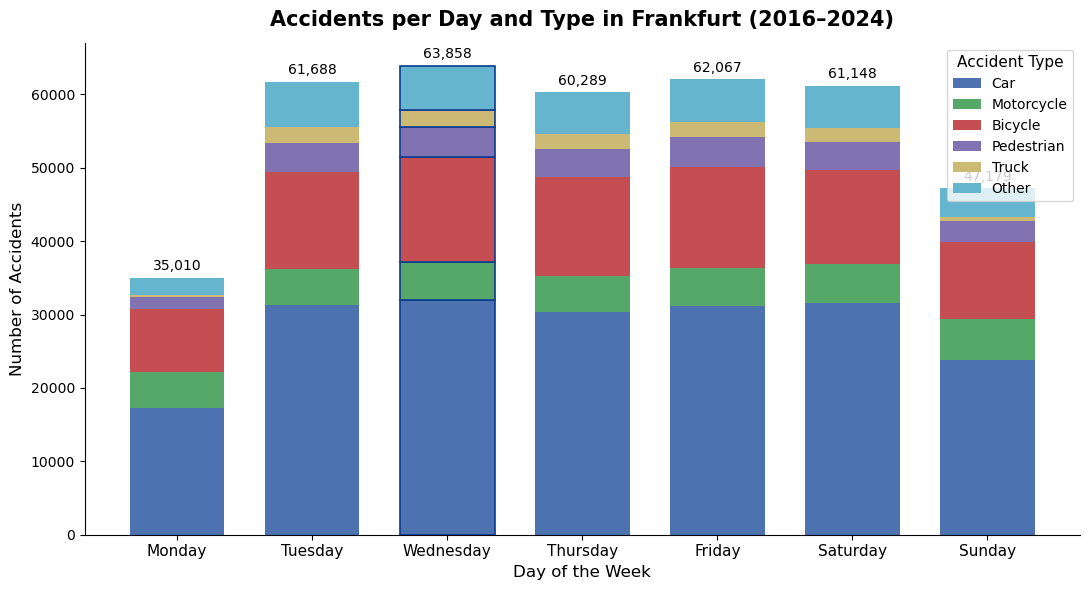

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- CONFIG: adjust if you know exact column names ---
weekday_col = 'UWOCHENTAG'   # column with weekday numbers 1..7 or names
# candidate accident-type column names (common in your dataset)
candidate_types = ['IstPKW', 'IstKrad', 'IstRad', 'IstFuss', 'IstGkfz', 'IstSonstige']

# --- safety checks ---
if weekday_col not in fr_2024.columns:
    raise KeyError(f"Weekday column '{weekday_col}' not found in dataframe. Columns: {list(fr_2024.columns)}")

# detect which accident type columns actually exist in your dataframe
accident_types = [c for c in candidate_types if c in fr_2024.columns]
if len(accident_types) == 0:
    # fallback: try to find columns starting with common prefixes
    accident_types = [c for c in fr_2024.columns if c.lower().startswith(('ist', 'is_', 'is'))][:6]

if len(accident_types) == 0:
    raise KeyError("No accident-type columns found. Please provide a list of columns that indicate type (e.g. 'IstPKW', 'IstKrad', 'IstRad').")

print("Using weekday column:", weekday_col)
print("Detected accident type columns (used in plot):", accident_types)

# --- Map weekday numbers to names if necessary ---
day_map = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
# If column already contains names, we will detect that below.

# make a copy to avoid mutating original
df = fr_2024.copy()

# If weekdays are numeric 1..7, map them to names; if they're already strings, leave as is
if pd.api.types.is_integer_dtype(df[weekday_col]) or pd.api.types.is_float_dtype(df[weekday_col]):
    df[weekday_col] = df[weekday_col].astype(int).map(day_map)
else:
    # try to normalize names (capitalize)
    df[weekday_col] = df[weekday_col].astype(str).str.strip().str.capitalize()

# Ensure order Monday..Sunday
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

# Aggregate sums per weekday for each accident type
summary = df.groupby(weekday_col)[accident_types].sum().reindex(weekday_order).fillna(0)
# Convert to integers for neat labels
summary = summary.astype(int)

# --- Plot with explicit stacking for reliable control ---
colors = [
    '#4C72B0',  # calm blue (cars)
    '#55A868',  # green (motorcycles)
    '#C44E52',  # soft red (bicycles)
    '#8172B2',  # muted purple (pedestrians)
    '#CCB974',  # warm yellow (trucks)
    '#64B5CD'   # teal (others)
]
# ensure colors length matches number of types
if len(colors) < len(accident_types):
    # extend colors repeating if needed
    colors = (colors * (len(accident_types)//len(colors) + 1))[:len(accident_types)]
else:
    colors = colors[:len(accident_types)]

x = np.arange(len(summary.index))
width = 0.7

fig, ax = plt.subplots(figsize=(11,6))

bottom = np.zeros(len(summary))
bars_by_type = []
for idx, col in enumerate(accident_types):
    vals = summary[col].values
    bars = ax.bar(x, vals, width, bottom=bottom, label=col, color=colors[idx])
    bars_by_type.append(bars)
    bottom = bottom + vals

# Make Wednesday slightly darker: we outline segments for Wednesday
wed_index = weekday_order.index('Wednesday')  # 2
for bars in bars_by_type:
    bar = bars[wed_index]
    bar.set_edgecolor('#0b3d91')  # dark navy outline
    bar.set_linewidth(1.2)

# Aesthetic adjustments: no grid, remove top/right spines
ax.set_xticks(x)
ax.set_xticklabels(summary.index, rotation=0, fontsize=11)
ax.set_ylabel("Number of Accidents", fontsize=12)
ax.set_xlabel("Day of the Week", fontsize=12)
ax.set_title("Accidents per Day and Type in Frankfurt (2016–2024)", fontsize=15, fontweight='bold', pad=12)

# Replace legend labels with friendlier names if you want:
legend_labels = {
    'IstPKW': 'Car',
    'IstKrad': 'Motorcycle',
    'IstRad': 'Bicycle',
    'IstFuss': 'Pedestrian',
    'IstGkfz': 'Truck',
    'IstSonstige': 'Other'
}
pretty_labels = [legend_labels.get(c, c) for c in accident_types]
ax.legend(bars_by_type, pretty_labels, title='Accident Type', fontsize=10, title_fontsize=11, loc='upper right')

for spine in ['top','right']:
    ax.spines[spine].set_visible(False)

# Add value labels on top of stacked bars (total per day)
totals = summary.sum(axis=1).values
for i, total in enumerate(totals):
    ax.text(x[i], total + max(totals)*0.01, f"{total:,}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

AttributeError: 'float' object has no attribute 'dtype'

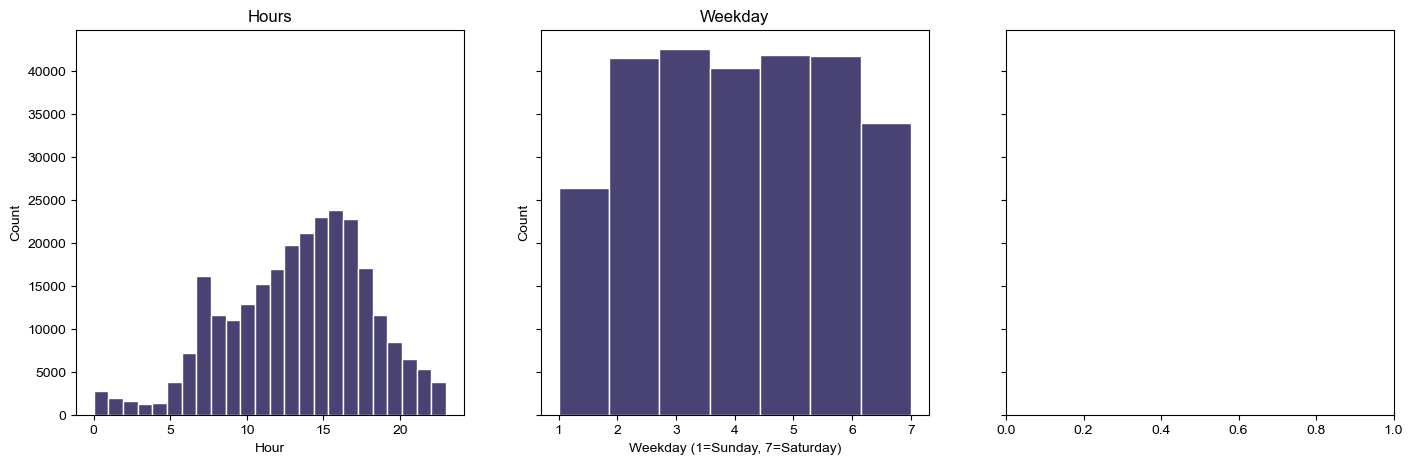

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17, 5), sharey=True)
project_color = "#494373"
sns.set_theme(style="darkgrid")

# Histogram for Hours (USTUNDE)
axes[0].hist(df['USTUNDE'], bins=24, color=project_color)
axes[0].set_title('Hours')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Count')

# Histogram for Weekdays (UWOCHENTAG)
axes[1].hist(df['UWOCHENTAG'], bins=7,color=project_color)
axes[1].set_title('Weekday')
axes[1].set_xlabel('Weekday (1=Sunday, 7=Saturday)')
axes[1].set_ylabel('Count')

# Histogram for Months (UMONAT)
axes[2].hist(df['UMONAT'], bins=12, color=project_color)
axes[2].set_title('Month')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Count')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

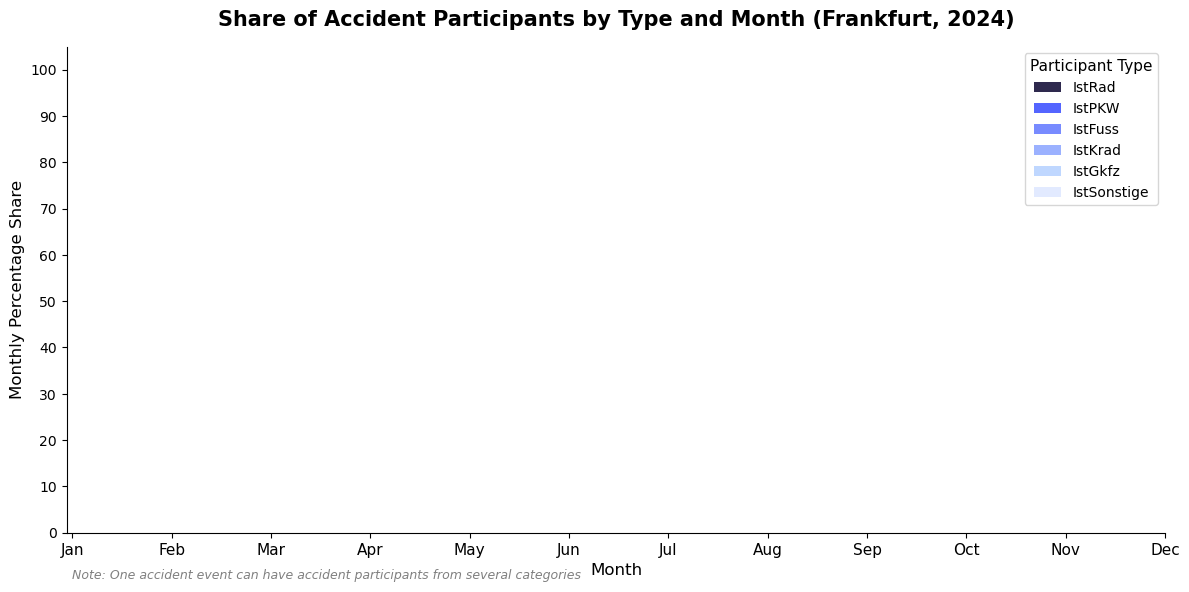

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- CONFIG ---
month_col = 'UMONAT'   # Month column (1 = Jan, ..., 12 = Dec)
accident_types = ['IstRad', 'IstPKW', 'IstFuss', 'IstKrad', 'IstGkfz', 'IstSonstige']

# --- Map month numbers to names ---
month_map = {
    1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
    7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
}
fr_2024[month_col] = fr_2024[month_col].map(month_map)

# --- Convert accident type columns to numeric (if needed) ---
for col in accident_types:
    if col in fr_2024.columns:
        fr_2024[col] = fr_2024[col].astype(str).str.strip().str.upper().map(
            {'X':1, 'JA':1, 'YES':1, 'TRUE':1, '1':1}
        ).fillna(0).astype(int)

# --- Summarize: total of each accident type per month ---
summary = fr_2024.groupby(month_col)[accident_types].sum().reindex(month_map.values()).fillna(0)

# --- Convert to percentages (each column as share of monthly total) ---
summary_percent = summary.div(summary.sum(axis=1), axis=0) * 100

# --- Modern, aesthetic color palette ---
colors = [
    '#2E294E',  # deep purple - IstRad (bicycle)
    '#5465FF',  # vivid blue - IstPKW (car)
    '#788BFF',  # medium blue - IstFuss (pedestrian)
    '#9BB1FF',  # light blue - IstKrad (motorcycle)
    '#BFD7FF',  # pale blue - IstGkfz (truck)
    '#E2EAFF'   # very light blue - IstSonstige (other)
]

# --- Plot setup ---
plt.figure(figsize=(12,6))
bottom = np.zeros(len(summary_percent))
x = np.arange(len(summary_percent.index))

# --- Draw stacked bars ---
for i, col in enumerate(accident_types):
    plt.bar(x, summary_percent[col].values, bottom=bottom, color=colors[i], label=col, width=0.7)
    # Add percentage labels
    for xi, val, btm in zip(x, summary_percent[col].values, bottom):
        if val > 1:  # skip very small values
            plt.text(xi, btm + val/2, f"{val:.1f}%", ha='center', va='center', color='white', fontsize=8, fontweight='bold')
    bottom += summary_percent[col].values

# --- Style ---
plt.title("Share of Accident Participants by Type and Month (Frankfurt, 2024)", fontsize=15, fontweight='bold', pad=15)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Monthly Percentage Share", fontsize=12)
plt.xticks(x, summary_percent.index, fontsize=11)
plt.yticks(np.arange(0, 110, 10))
plt.ylim(0, 105)

plt.legend(title='Participant Type', fontsize=10, title_fontsize=11, loc='upper right')

# --- Clean layout ---
plt.grid(False)
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# --- Optional note below chart ---
plt.text(0, -10, "Note: One accident event can have accident participants from several categories",
         fontsize=9, color='gray', style='italic')

plt.tight_layout()
plt.show()

In [26]:
fr_2024[accident_types + [month_col]].head(15)

,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,UMONAT
0,0,1,0,0,0,0,NaN
1,0,1,0,0,0,0,NaN
2,0,0,0,1,0,0,NaN
3,1,1,0,0,0,0,NaN
4,0,1,0,0,0,0,NaN
5,0,1,0,0,0,0,NaN
6,1,0,0,0,0,0,NaN
7,1,1,0,0,0,0,NaN
8,0,1,0,0,0,0,NaN
9,1,1,0,0,0,0,NaN


Accidents per year:
 UJAHR
2024    268519
Name: count, dtype: int64


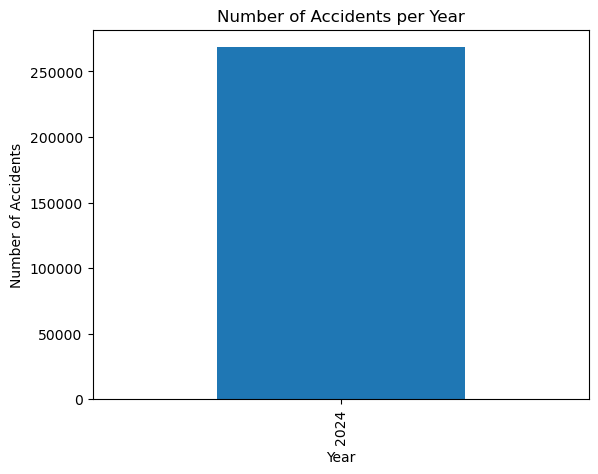

In [85]:
year_counts = fr_2024['UJAHR'].value_counts().sort_index()
print("Accidents per year:\n", year_counts)
plt.figure()
year_counts.plot(kind='bar')
plt.title('Number of Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

In [86]:
hour_counts = fr_2019['USTUNDE'].value_counts().sort_values(ascending=False)
hour_counts

USTUNDE
16    23661
17    23027
15    22110
14    20228
13    19361
7     17620
18    17300
12    16680
11    15457
10    13259
8     12656
9     12276
19    11637
6      8291
20     7865
21     5801
22     4908
5      4257
23     3276
0      2363
1      1889
4      1549
2      1533
3      1366
Name: count, dtype: int64


Severe accidents by state (ULAND):
 ULAND
5     10138
09     8597
08     5693
03     4299
06     3064
14     2748
07     2379
12     1724
11     1699
01     1648
15     1523
16     1144
13      987
02      689
10      552
04      293
Name: count, dtype: int64


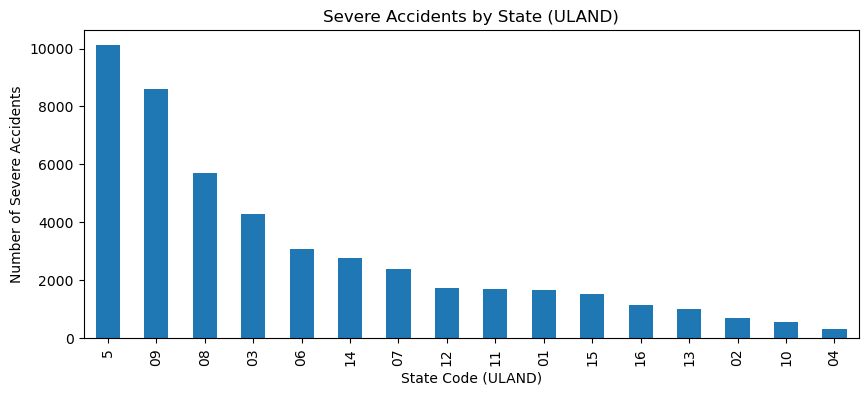

In [87]:
#State with the most number of severe accidents
severe = fr_2021[fr_2021['UKATEGORIE'].isin([1, 2])]  # 1=killed, 2=seriously injured
severe_by_state = severe['ULAND'].value_counts().sort_values(ascending=False)
print("\nSevere accidents by state (ULAND):\n", severe_by_state)
plt.figure(figsize=(10,4))
severe_by_state.plot(kind='bar')
plt.title('Severe Accidents by State (ULAND)')
plt.xlabel('State Code (ULAND)')
plt.ylabel('Number of Severe Accidents')
plt.show()


Accidents by day of the week (descending order):
 UWOCHENTAG
Tuesday      42604
Thursday     41831
Friday       41789
Monday       41482
Wednesday    40399
Saturday     33999
Sunday       26415
Name: count, dtype: int64


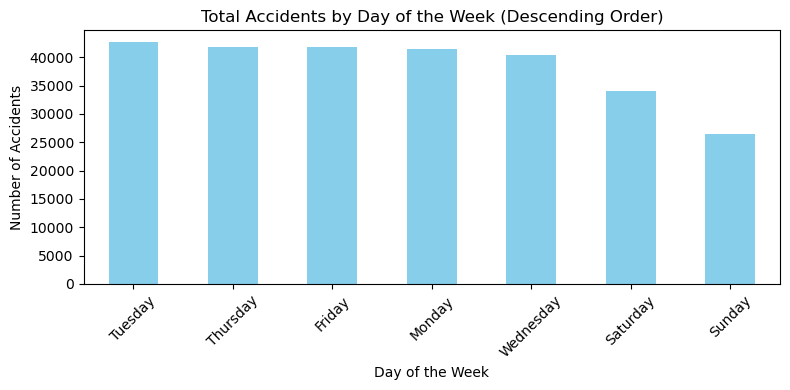

In [88]:
import matplotlib.pyplot as plt

# Count number of accidents per day of the week
accidents_by_day = fr_2024['UWOCHENTAG'].value_counts().sort_values(ascending=False)

# Map day numbers to readable names (per documentation)
day_names = {
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday',
    7: 'Saturday'
}

# Replace numeric codes with names
accidents_by_day.index = accidents_by_day.index.map(day_names)

# Print results
print("\nAccidents by day of the week (descending order):\n", accidents_by_day)

# Plot results
plt.figure(figsize=(8,4))
accidents_by_day.plot(kind='bar', color='skyblue')
plt.title('Total Accidents by Day of the Week (Descending Order)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Accidents by hour of the day (descending order):
 USTUNDE
16    23425
17    23097
15    22797
14    20937
13    19636
18    17585
12    16928
7     16240
11    15121
10    12999
19    12150
8     12019
9     11319
20     8257
6      7539
21     6400
22     5197
5      4115
23     3755
0      2785
1      2093
2      1661
4      1557
3      1436
Name: count, dtype: int64


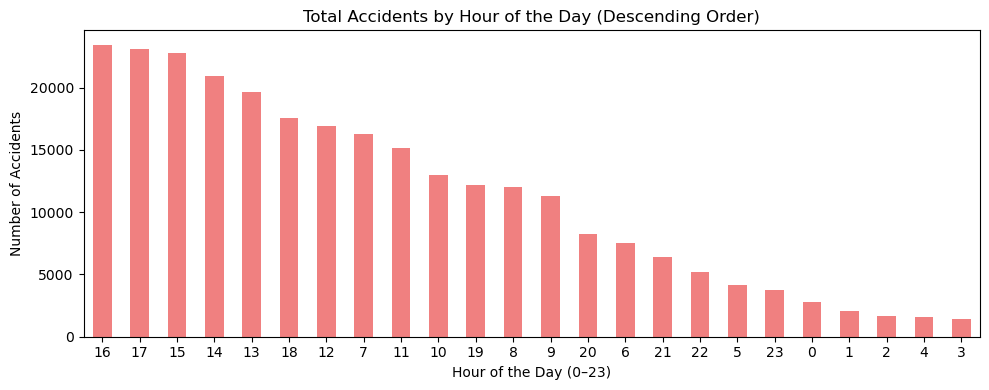


➡️ The hour with the most accidents is 16:00 with 23425 accidents.


In [89]:
import matplotlib.pyplot as plt

# Count number of accidents per hour
accidents_by_hour = fr_2023['USTUNDE'].value_counts().sort_values(ascending=False)

# Print results
print("\nAccidents by hour of the day (descending order):\n", accidents_by_hour)

# Plot results
plt.figure(figsize=(10,4))
accidents_by_hour.plot(kind='bar', color='lightcoral')
plt.title('Total Accidents by Hour of the Day (Descending Order)')
plt.xlabel('Hour of the Day (0–23)')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Print the hour with the most accidents
top_hour = accidents_by_hour.index[0]
top_count = accidents_by_hour.iloc[0]
print(f"\n➡️ The hour with the most accidents is {top_hour}:00 with {top_count} accidents.")

In [90]:
conda install openpyxl


2 channel Terms of Service accepted
Channels:
 - defaults
Platform: osx-arm64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 25.5.1
    latest version: 25.9.1

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to your CSV
file_path = "/Users/gazizajanabayeva/Documents/Data-analytics/46241-0002_de_flat.csv"

# Read normally — no skiprows needed because this version is already clean
trend_df = pd.read_csv(file_path, sep=';', encoding='utf-8')

# Preview structure
print(trend_df.head())
print("\nColumns:\n", trend_df.columns.tolist())

   statistics_code                      statistics_label time_code time_label  \
0            46241  Statistik der Straßenverkehrsunfälle      JAHR       Jahr   
1            46241  Statistik der Straßenverkehrsunfälle      JAHR       Jahr   
2            46241  Statistik der Straßenverkehrsunfälle      JAHR       Jahr   
3            46241  Statistik der Straßenverkehrsunfälle      JAHR       Jahr   
4            46241  Statistik der Straßenverkehrsunfälle      JAHR       Jahr   

   time 1_variable_code 1_variable_label 1_variable_attribute_code  \
0  2021           MONAT           Monate                   MONAT10   
1  2022           MONAT           Monate                   MONAT12   
2  2018           MONAT           Monate                   MONAT06   
3  2017           MONAT           Monate                   MONAT04   
4  2020           MONAT           Monate                   MONAT11   

  1_variable_attribute_label 2_variable_code       2_variable_label  \
0                    

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# Rename important columns for clarity
trend_df = trend_df.rename(columns={
    'time': 'Jahr',
    '1_variable_attribute_label': 'Monat',
    'value': 'Anzahl'  # change if your numeric column has a different name
})

# Convert numeric values safely
trend_df['Anzahl'] = pd.to_numeric(trend_df['Anzahl'], errors='coerce')

# Keep only the relevant columns
trend_df = trend_df[['Jahr', 'Monat', 'Anzahl']].dropna()

# Ensure correct month order (German month names)
month_order = ["Januar", "Februar", "März", "April", "Mai", "Juni",
               "Juli", "August", "September", "Oktober", "November", "Dezember"]
trend_df['Monat'] = pd.Categorical(trend_df['Monat'], categories=month_order, ordered=True)

print(trend_df.head())

   Jahr     Monat  Anzahl
0  2021   Oktober    1684
1  2022  Dezember   12501
2  2018      Juni  168802
3  2017     April    1246
4  2020  November  133939


/var/folders/hs/st8116qx2y967vqvqw7zq74c0000gn/T/ipykernel_5883/4083907014.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = trend_df.groupby('Monat')['Anzahl'].mean().reindex(month_order)


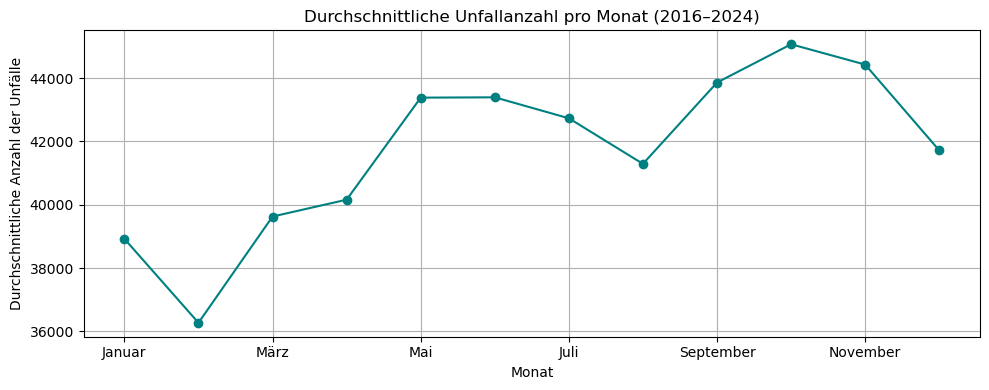

In [99]:
monthly_avg = trend_df.groupby('Monat')['Anzahl'].mean().reindex(month_order)

plt.figure(figsize=(10,4))
monthly_avg.plot(marker='o', color='teal')
plt.title("Durchschnittliche Unfallanzahl pro Monat (2016–2024)")
plt.xlabel("Monat")
plt.ylabel("Durchschnittliche Anzahl der Unfälle")
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/hs/st8116qx2y967vqvqw7zq74c0000gn/T/ipykernel_5883/4083907014.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = trend_df.groupby('Monat')['Anzahl'].mean().reindex(month_order)


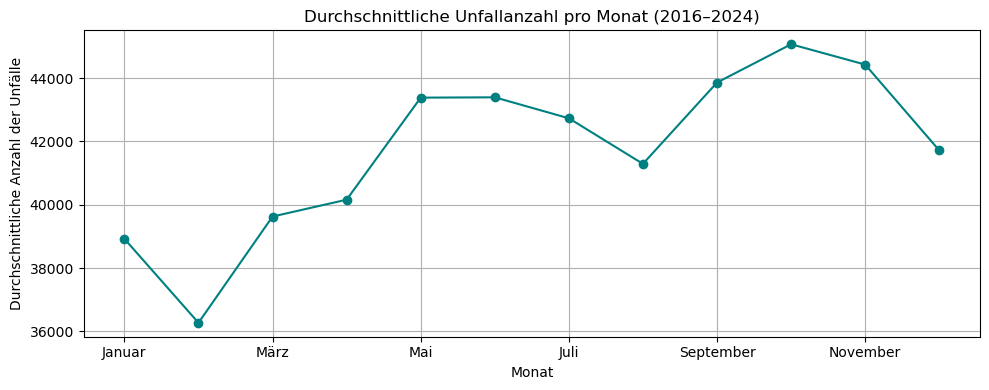

In [104]:
monthly_avg = trend_df.groupby('Monat')['Anzahl'].mean().reindex(month_order)

plt.figure(figsize=(10,4))
monthly_avg.plot(marker='o', color='teal')
plt.title("Durchschnittliche Unfallanzahl pro Monat (2016–2024)")
plt.xlabel("Monat")
plt.ylabel("Durchschnittliche Anzahl der Unfälle")
plt.grid(True)
plt.tight_layout()
plt.show()

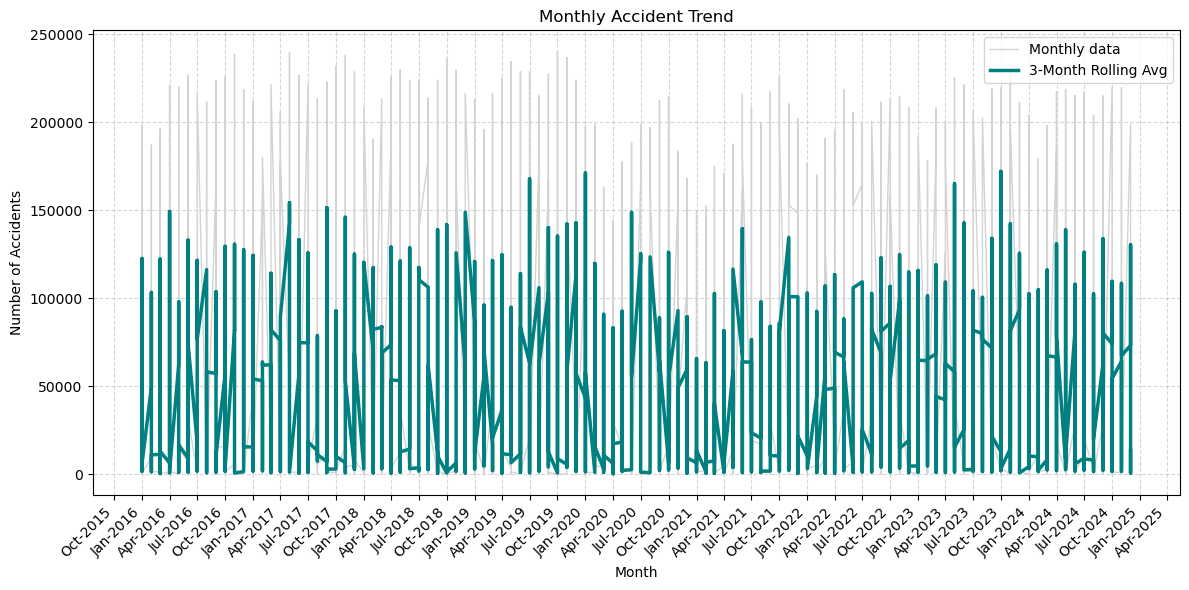

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# assume trend_df already exists with columns: ['Jahr', 'Monat', 'Anzahl']

# 1) Map German month names to numbers
month_map = {
    "Januar": 1, "Februar": 2, "März": 3, "Maerz": 3, "April": 4,
    "Mai": 5, "Juni": 6, "Juli": 7, "August": 8,
    "September": 9, "Oktober": 10, "November": 11, "Dezember": 12
}

# If months are not exact (e.g. abbreviations), normalize them slightly:
trend_df['Monat'] = trend_df['Monat'].astype(str).str.strip()

# 2) Create numeric month and datetime 'Datum'
trend_df['Monat_num'] = trend_df['Monat'].map(lambda m: month_map.get(m, pd.NA))
# If some months didn't map (NaN), try matching first 3 letters (e.g., "Jan")
trend_df.loc[trend_df['Monat_num'].isna(), 'Monat_num'] = (
    trend_df.loc[trend_df['Monat_num'].isna(), 'Monat']
    .str[:3].map({"Jan":1,"Feb":2,"Mär":3,"Mar":3,"Apr":4,"Mai":5,"Jun":6,"Jul":7,"Aug":8,"Sep":9,"Okt":10,"Nov":11,"Dez":12})
)

# 3) Convert Jahr and Anzahl to numeric and build Datum
trend_df['Jahr'] = pd.to_numeric(trend_df['Jahr'], errors='coerce')
trend_df['Anzahl'] = pd.to_numeric(trend_df['Anzahl'], errors='coerce')

trend_df['Datum'] = pd.to_datetime(dict(year=trend_df['Jahr'].astype('Int64'),
                                        month=trend_df['Monat_num'].astype('Int64'),
                                        day=1), errors='coerce')

# 4) Drop rows that could not be parsed
trend_df = trend_df.dropna(subset=['Datum', 'Anzahl']).sort_values('Datum').reset_index(drop=True)

# 5) Rolling average (optional)
trend_df['Rolling_3M'] = trend_df['Anzahl'].rolling(window=3, center=True).mean()

# 6) Plot
plt.figure(figsize=(12,6))
plt.plot(trend_df['Datum'], trend_df['Anzahl'], color='lightgray', linewidth=1, label='Monthly data')
plt.plot(trend_df['Datum'], trend_df['Rolling_3M'], color='teal', linewidth=2.5, label='3-Month Rolling Avg')

plt.title("Monthly Accident Trend")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))   # e.g. Jan-2016
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # tick every 3 months
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(12,6))

# Loop through each category/city
for cat, subset in trend_df.groupby('Kategorie'):
    subset = subset.sort_values('Datum')
    plt.plot(subset['Datum'], subset['Anzahl'], marker='o', label=cat)

plt.title("Unfalltrend nach Kategorie (2016–2024)")
plt.xlabel("Monat")
plt.ylabel("Anzahl der Unfälle")
plt.legend(title="Kategorie", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to numeric and make sure 'Monat' is a string
fr_2024['Anzahl'] = pd.to_numeric(trend_df['Anzahl'], errors='coerce')
fr_2024['Monat'] = fr_2024['Monat'].astype(str).str.strip()

# Keep only January rows
january_df = fr_2024[fr_2024['Monat'].str.lower().isin(['januar', 'jan'])].copy()

# Sort by year
january_df = january_df.sort_values('Jahr')

# Plot
plt.figure(figsize=(10,5))
plt.plot(january_df['Jahr'], january_df['Anzahl'], marker='o', color='teal', linewidth=2)

plt.title("January Accident Trend in Germany (2024)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Accidents (January)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

NameError: name 'trend_df' is not defined

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Keep only January rows
january_df = trend_df[trend_df['Monat'].str.lower().isin(['januar', 'jan'])].copy()

# Convert to numeric just in case
january_df['Anzahl'] = pd.to_numeric(january_df['Anzahl'], errors='coerce')

# ✅ Group by year to get total January accidents
january_totals = january_df.groupby('Jahr', as_index=False)['Anzahl'].sum()

# Plot
plt.figure(figsize=(10,5))
plt.plot(january_totals['Jahr'], january_totals['Anzahl'], marker='o', color='teal', linewidth=2)

plt.title("January Accident Trend in Germany (2024)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Number of Accidents (January)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

NameError: name 'trend_df' is not defined